# Ejercicio 1

Usar el conjunto de datos Arvertising y determinar los siguientes Modelos de regresión lineal

*   Sales = $\beta_0$ + $\beta_1 \times $ TV
*   Sales = $\beta_0$ + $\beta_1 \times $ Radio
*   Sales = $\beta_0$ + $\beta_1 \times $ Newspaper
*   Sales = $\beta_0$ + $\beta_1 \times $ TV +$\beta_2 \times $ Radio + $\beta_3 \times $ Newspaper
*   Sales = $\beta_0$ + $\beta_1 \times $ TV +$\beta_2 \times $ Radio + $\beta_3 \times $ TV $\times $ Radio

En cada caso, obtener el MSE y el MAE.

$$MSE=\frac{\displaystyle\sum_{i=1}^{N}(Y_{\text{real},i}-Y_{\text{pred},i})^{2}}{N}$$


$$MAE=\frac{\displaystyle\sum_{i=1}^{N}  |Y_{\text{real},i}-Y_{\text{pred},i}|}{N}$$


In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Data/Advertising.csv')

In [3]:
data.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data1 = np.array([data['sales']]).T


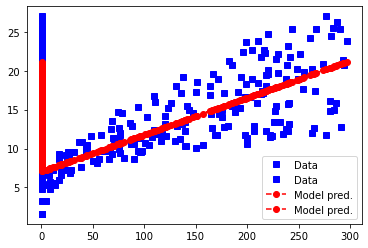

In [13]:
# design matrix
X = np.concatenate( [np.ones((len(data['TV']), 1)), np.array([data['TV']]).T],axis=1)
# fit the model
b = np.linalg.solve(X.T@X,X.T@data1)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(X,data1,'bs',label='Data')
plt.plot(X,yHat,'ro--',label='Model pred.')
plt.legend()
plt.show()

In [20]:
print('MSE:',mean_squared_error(data1, yHat))
print('MAE:',mean_absolute_error(data1, yHat))

MSE: 10.512652915656757
MAE: 2.5498060389274873


In [26]:
data2 = np.array([data['sales']]).T

N = len(data['radio'].T)


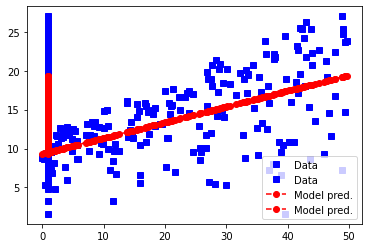

In [29]:
# design matrix
X2 = np.concatenate( [np.ones((len(data['radio']), 1)), np.array([data['radio']]).T],axis=1)

# fit the model
b2 = np.linalg.solve(X2.T@X2,X2.T@data2)

# compute the model-predicted values
yHat2 = X2@b2

# plot data and model prediction
plt.plot(X2,data2,'bs',label='Data')
plt.plot(X2,yHat2,'ro--',label='Model pred.')

plt.legend()
plt.show()

In [30]:
print('MSE:',mean_squared_error(data2, yHat2))
print('MAE:',mean_absolute_error(data2, yHat2))

MSE: 18.09239774512544
MAE: 3.3202187976420667


In [32]:
data3 = np.array([data['sales']]).T

N = len(data['newspaper'].T)


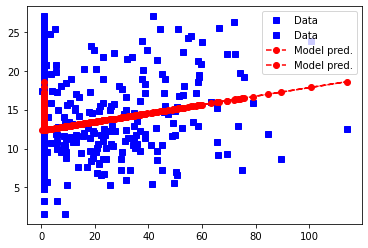

In [33]:
# design matrix
X3 = np.concatenate( [np.ones((len(data['newspaper']), 1)), np.array([data['newspaper']]).T],axis=1)
# fit the model
b3= np.linalg.solve(X3.T@X3,X3.T@data3)

# compute the model-predicted values
yHat3 = X3@b3

# plot data and model prediction
plt.plot(X3,data3,'bs',label='Data')
plt.plot(X3,yHat3,'ro--',label='Model pred.')

plt.legend()
plt.show()

In [34]:
print('MSE:',mean_squared_error(data3, yHat3))
print('MAE:',mean_absolute_error(data3, yHat3))

MSE: 25.674022720559698
MAE: 4.1465597438384885


In [47]:
data4 = data[['sales']]

N = len(data[['TV', 'radio', 'newspaper']])


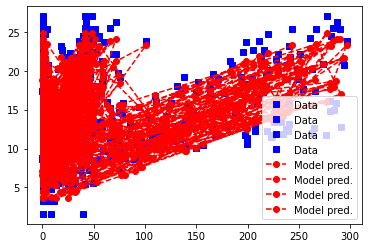

In [50]:
# design matrix
X4 = np.concatenate( [np.ones((len(data['newspaper']), 1)), np.array([data['TV']]).T,
                      np.array([data['radio']]).T,
                      np.array([data['newspaper']]).T
                      ],axis=1)

# fit the model
b4= np.linalg.solve(X4.T@X4,X4.T@data4)

# compute the model-predicted values
yHat4 = X4@b4

# plot data and model prediction
plt.plot(X4,data4, 'bs',label='Data')
plt.plot(X4,yHat4, 'ro--',label='Model pred.')

plt.legend()
plt.show()

In [51]:
print('MSE:',mean_squared_error(data4, yHat4))
print('MAE:',mean_absolute_error(data4, yHat4))

MSE: 2.784126314510936
MAE: 1.2520112296870667


In [52]:
data5 = data[['sales']]

N = len(data[['TV', 'radio', 'newspaper']])


C:\Users\DELL\AppData\Local\Temp/ipykernel_29848/1528293657.py:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  np.multiply(data[['TV']], data[['radio']])


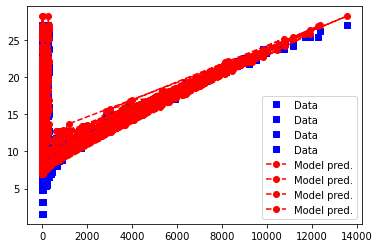

In [55]:
# design matrix
X5 = np.concatenate( [np.ones((len(data[['TV', 'radio']]), 1)), np.array([data['radio']]).T,
                                np.array([data['TV']]).T ,
                                np.multiply(data[['TV']], data[['radio']])
                      ],axis=1)

# fit the model
b5= np.linalg.solve(X5.T@X5,X5.T@data5)

# compute the model-predicted values
yHat5 = X5@b5

# plot data and model prediction
plt.plot(X5,data5, 'bs',label='Data')
plt.plot(X5,yHat5, 'ro--',label='Model pred.')

plt.legend()
plt.show()

In [56]:
print('MSE:',mean_squared_error(data5, yHat5))
print('MAE:',mean_absolute_error(data5, yHat5))

MSE: 0.8724169131386358
MAE: 0.6604837217764836


# Ejercicio 2

Usar el conjunto de datos Salary_dataset y determinar los modelos de regresión polinomial de la forma:


$$Salary = \beta_0 + \beta_1 \times  \text{YearsExperience} + \beta_1 \times  \text{YearsExperience}^{2}+ \cdots + \text{YearsExperience}^{P} $$

Evaluar para cada $P=1,2,3,4,5$ y obtener el valor de $P$ más adeacuado en función del MSE y MAE.


In [60]:
data_s = pd.read_csv('Data/Salary_dataset.csv')
data_s = data_s.drop(columns=['Unnamed: 0'])

In [62]:
p_list = [1, 2, 3, 4, 5]

In [67]:
def gen_matrix(x_values, p_value):
  matrix = np.ones((len(x_values), 1))

  for i in range (p_value):
    matrix = np.concatenate((matrix, x_values**(i+1)), axis=1)

  return matrix


In [68]:

def normalize(df):
  max_val = df.max()
  return df / max_val

In [70]:
x = data_s[['YearsExperience']]
y = data_s[['Salary']]
y = normalize(y)

In [73]:
def calculate_pols(x, p_list):
  results = {}
  for p in p_list:
    current_A = gen_matrix(x, p)
    current_b = np.linalg.solve(current_A.T@current_A, current_A.T@y)
    current_yHat = current_A@current_b
    results[p] = [mean_squared_error(y, current_yHat), mean_absolute_error(y, current_yHat)]
return results

In [74]:
print(tabulate(format_dict(calculate_pols(x, p_list)), headers=['Grad P', 'MSE', 'MAE'], tablefmt="grid"))

+----------+------------+-----------+
|   Grad P |        MSE |       MAE |
+==========+============+===========+
|        1 | 0.00208754 | 0.0379453 |
+----------+------------+-----------+
|        2 | 0.00208664 | 0.0380178 |
+----------+------------+-----------+
|        3 | 0.0017655  | 0.0348803 |
+----------+------------+-----------+
|        4 | 0.00176263 | 0.034852  |
+----------+------------+-----------+
|        5 | 0.00162205 | 0.0337118 |
+----------+------------+-----------+
